# Dataset







__Overall__  
We are going to use foursquare location data to find top 100 american restaurants in San Francisco

__For problem 1__  
We are going to take the first 30 records to represent our current list of customers

__For problem 2__  
We are going to take the first 90 records to represent our future list of customers 

## This is the code

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0

In [2]:
CLIENT_ID = 'FJWQK20PTI3RNPU3CLXODPPMNX4WPVBS0UTJBW5X20HKD2P0' # your Foursquare ID
CLIENT_SECRET = '3NPUXRCEJ31MOZS1D3ZF0CWKEWHPXH4BCOKMBHE2ODTN13TI' # your Foursquare Secret
VERSION = '20180610'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + 'CLIENT_ID')
print('CLIENT_SECRET:' + 'CLIENT_SECRET')

Your credentails:
CLIENT_ID: CLIENT_ID
CLIENT_SECRET:CLIENT_SECRET


In [3]:
address = 'San francisco, USA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

37.7790262 -122.4199061


In [4]:
search_query = 'restaurant'
category_Id = '4bf58dd8d48988d14e941735'
radius = 5000
LIMIT = 90
VERSION='20180610'

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    latitude, 
    longitude, 
    VERSION, 
    radius, 
    LIMIT,
    category_Id)
url

'https://api.foursquare.com/v2/venues/explore?client_id=FJWQK20PTI3RNPU3CLXODPPMNX4WPVBS0UTJBW5X20HKD2P0&client_secret=3NPUXRCEJ31MOZS1D3ZF0CWKEWHPXH4BCOKMBHE2ODTN13TI&ll=37.7790262,-122.4199061&v=20180610&radius=5000&limit=90&categoryId=4bf58dd8d48988d14e941735'

In [5]:
results = requests.get(url).json()

In [6]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [7]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
#filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
filtered_columns = ['venue.name', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
#nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
#nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.columns = ['Customer', 
                  'Latitude', 
                  'Longitude']

nearby_venues.head()

AttributeError: 'NoneType' object has no attribute 'items'

                  Customer   Latitude   Longitude
0             The Progress  37.783745 -122.432972
1  Dottie's True Blue Cafe  37.781748 -122.409829
2              Box Kitchen  37.781158 -122.406243
3                  Octavia  37.787935 -122.426934
4     Morty's Delicatessen  37.781710 -122.415243

In [8]:
nearby_venues.shape

(90, 3)

In [9]:
current_cust=nearby_venues.head(30)

current_cust.shape

(30, 3)

In [10]:
current_cust.head()

AttributeError: 'NoneType' object has no attribute 'items'

                  Customer   Latitude   Longitude
0             The Progress  37.783745 -122.432972
1  Dottie's True Blue Cafe  37.781748 -122.409829
2              Box Kitchen  37.781158 -122.406243
3                  Octavia  37.787935 -122.426934
4     Morty's Delicatessen  37.781710 -122.415243

In [11]:
map_current = folium.Map(location=[latitude, longitude], zoom_start=13)

for lat, lng, label in zip(current_cust['Latitude'], current_cust['Longitude'], current_cust['Customer']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_current)  

map_current


In [12]:
future_cust=nearby_venues

future_cust.shape

(90, 3)

In [13]:
future_cust

AttributeError: 'NoneType' object has no attribute 'items'

                       Customer   Latitude   Longitude
0                  The Progress  37.783745 -122.432972
1       Dottie's True Blue Cafe  37.781748 -122.409829
2                   Box Kitchen  37.781158 -122.406243
3                       Octavia  37.787935 -122.426934
4          Morty's Delicatessen  37.781710 -122.415243
..                          ...        ...         ...
85          The Educated Palate  37.784551 -122.404365
86  San Francisco Athletic Club  37.786062 -122.440034
87                         Eats  37.783210 -122.460090
88                 Sunrise Cafe  37.770974 -122.409196
89                       Stacks  37.776532 -122.424646

[90 rows x 3 columns]

In [14]:
map_future = folium.Map(location=[latitude, longitude], zoom_start=13)

for lat, lng, label in zip(future_cust['Latitude'], future_cust['Longitude'], future_cust['Customer']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_future)  

map_future

In [15]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('sklearn installed')

sklearn installed


In [16]:
# set number of clusters
kclusters = 1

current_cust_clustering = current_cust.drop('Customer', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(current_cust_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [17]:
current_cust.insert(0, 'Cluster Labels', kmeans.labels_)

In [18]:
kmeans = KMeans(n_clusters=kclusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

pred_y = kmeans.fit_predict(current_cust_clustering)

centroids = kmeans.cluster_centers_

df_centroids = pd.DataFrame(centroids, columns=['latitude','longitude'])

In [19]:
df_centroids=df_centroids.reset_index()

df_centroids

AttributeError: 'NoneType' object has no attribute 'items'

   index  latitude   longitude
0      0  37.78118 -122.415941

In [20]:
map_current2 = folium.Map(location=[latitude, longitude], zoom_start=14)

for lat, lng, label in zip(current_cust['Latitude'], current_cust['Longitude'], current_cust['Customer']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_current2)  
    
for lat, lng, label in zip(df_centroids['latitude'], df_centroids['longitude'], df_centroids['index']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='red',
        opacity=0.1,
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        parse_html=False).add_to(map_current2)  

map_current2

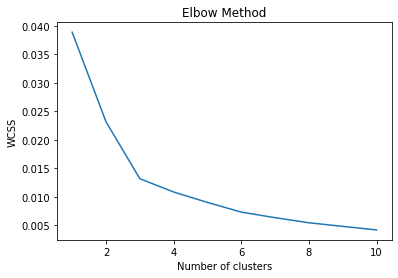

In [21]:
future_cust_clustering = future_cust.drop('Customer', 1)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(future_cust_clustering)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
wcss

[0.0388807300155652,
 0.023171733852803408,
 0.013163042165356466,
 0.010823579941364514,
 0.00899353913157163,
 0.007295734437968645,
 0.0063140863901507095,
 0.005419913798484395,
 0.004789118323454595,
 0.0041659255000176774]

In [24]:
pctImproved=[]
actImproved=[]

for i in range(1,9):
    pctImproved.append((wcss[i] - wcss[i+1]) / wcss[i])
    actImproved.append((wcss[i] - wcss[i+1]))
    
actImproved

[0.010008691687446942,
 0.002339462223991952,
 0.0018300408097928836,
 0.0016978046936029856,
 0.0009816480478179353,
 0.0008941725916663144,
 0.0006307954750298002,
 0.0006231928234369175]

In [25]:
# set number of clusters
kclusters = 3

future_cust_clustering = future_cust.drop('Customer', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(future_cust_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 1, 2, 1, 1, 1, 1, 0, 0], dtype=int32)

In [26]:
kmeans = KMeans(n_clusters=kclusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

pred_y2 = kmeans.fit_predict(future_cust_clustering)

centroids2 = kmeans.cluster_centers_

df_centroids2 = pd.DataFrame(centroids2, columns=['latitude','longitude'])

In [27]:
future_cust.insert(0, 'Cluster Labels', kmeans.labels_)


In [28]:
df_centroids2=df_centroids2.reset_index()

df_centroids2

AttributeError: 'NoneType' object has no attribute 'items'

   index   latitude   longitude
0      0  37.766236 -122.422152
1      1  37.786743 -122.402110
2      2  37.794098 -122.432219

In [29]:
## create map
map_future2 = folium.Map(location=[latitude, longitude], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nearby_venues['Latitude'], nearby_venues['Longitude'], nearby_venues['Customer'], nearby_venues['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
#        color=rainbow[cluster-1],
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_future2)
    
for lat, lng, label in zip(df_centroids2['latitude'], df_centroids2['longitude'], df_centroids2['index']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.9,
        parse_html=False).add_to(map_future2)  
    
map_future2

200 McAllister, 200 McAllister St, San Francisco, CA 94102




412 Valencia St, San Francisco, CA 94103

680 Mission Street, San Francisco, CA 94105

2200 Pacific Ave, San Francisco, CA 94115

In [36]:
future_cust.groupby(['Cluster Labels']).count()

,Customer,Latitude,Longitude
Cluster Labels,,,
0,25,25,25
1,41,41,41
2,24,24,24
